In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

In [112]:
data = pd.read_csv('data.csv')



In [113]:
data.head()

,Nama,Umur,Jenis_Kelamin,Berat_Badan,Tinggi_Badan,Penurunan_Berat_Badan,Frekuensi_Makan,Variasi_Makanan,Asupan_Protein,Mobilitas,Aktivitas_Sehari_hari,Kesehatan_Mulut,Penyakit_Kronis,Stres,Masalah_Kognitif
0,Junaidi,90,Laki-laki,70,166,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
1,Tumini,82,Perempuan,56,145,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
2,Yusraidi Sitompul,74,Laki-laki,52,146,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
3,Yuni Astuti,60,Perempuan,48,146,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat
4,Yulwanda,69,Perempuan,51,170,0,Tiga kali atau lebih,"Makanan bervariasi (misalnya daging, sayuran, ...",Dua kali sehari atau lebih,Bergerak dengan bebas tanpa bantuan,Tidak ada kesulitan,Tidak ada masalah,Tidak,Tidak,Tidak ada masalah daya ingat


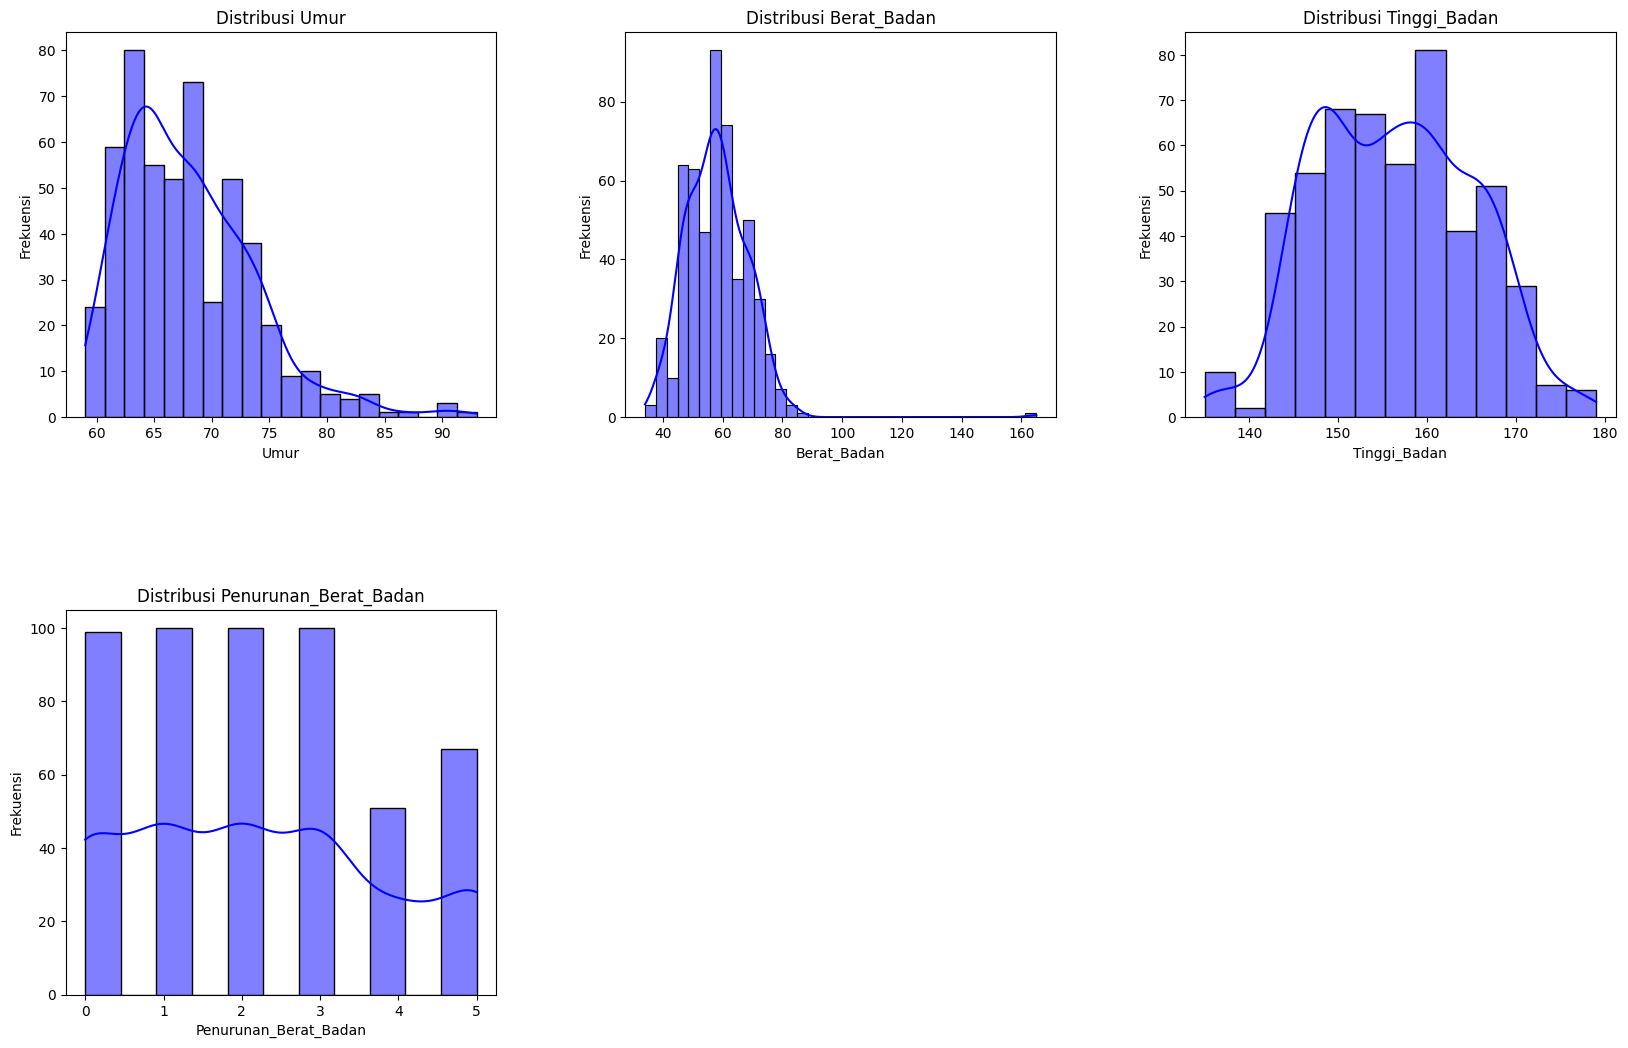

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

filter_out = [
    'Jenis_Kelamin'
]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = data.select_dtypes(include=numerics)

num_df = num_df.drop(columns=[col for col in filter_out if col in num_df.columns], errors='ignore')
columns = num_df.columns.to_list()

num_columns = len(columns)
grid_size = int(num_columns ** 0.5) + 1

for i, column in enumerate(columns, start=1):
    plt.subplot(grid_size, grid_size, i)
    sns.histplot(num_df[column], kde=True, color='blue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 0))

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


In [115]:
# Konversi
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].map({'Perempuan': 1, 'Laki-laki': 0})
data['Penyakit_Kronis'] = data['Penyakit_Kronis'].map({
    'Ya': 1, 'Tidak': 0,
})
data['Stres'] = data['Stres'].map({'Ya': 1, 'Tidak': 0})
data['Frekuensi_Makan'] = data['Frekuensi_Makan'].map({
    'Tiga kali atau lebih':3,
    'Dua kali': 2,
    'Satu kali atau kurang': 1
})                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
data['Variasi_Makanan'] = data['Variasi_Makanan'].map({
    'Makanan bervariasi (misalnya daging, sayuran, buah)': 3,
    'Makanan terbatas pada beberapa jenis saja': 2,
    'Makanan sangat terbatas atau monoton': 1
})

data['Asupan_Protein'] = data['Asupan_Protein'].map({
    'Dua kali sehari atau lebih': 3,
    'Sekali sehari': 2,
    'Kurang dari sekali sehari atau tidak pernah':1
})

data['Mobilitas']=data['Mobilitas'].map({
    'Bergerak dengan bebas tanpa bantuan':3,
    'Bergerak dengan bantuan':2,
    'Tidak dapat bergerak tanpa bantuan orang lain':1
})

data['Aktivitas_Sehari_hari']=data['Aktivitas_Sehari_hari'].map({
    'Tidak ada kesulitan':3,
    'Kesulitan ringan':2,
    'Kesulitan berat':1
})

data['Kesehatan_Mulut']=data['Kesehatan_Mulut'].map({
    'Tidak ada masalah':3,
    'Ada kesulitan ringan':2,
    'Kesulitan berat':1
})

data['Masalah_Kognitif']=data['Masalah_Kognitif'].map({
    'Tidak ada masalah daya ingat':3,
    'Ada sedikit masalah daya ingat':2,
    'Masalah daya ingat yang signifikan':1
})


In [116]:
print("\nData setelah konversi kategorikal:")
data.head()


Data setelah konversi kategorikal:


,Nama,Umur,Jenis_Kelamin,Berat_Badan,Tinggi_Badan,Penurunan_Berat_Badan,Frekuensi_Makan,Variasi_Makanan,Asupan_Protein,Mobilitas,Aktivitas_Sehari_hari,Kesehatan_Mulut,Penyakit_Kronis,Stres,Masalah_Kognitif
0,Junaidi,90,0,70,166,0,3,3,3,3,3,3,0,0,3
1,Tumini,82,1,56,145,0,3,3,3,3,3,3,0,0,3
2,Yusraidi Sitompul,74,0,52,146,0,3,3,3,3,3,3,0,0,3
3,Yuni Astuti,60,1,48,146,0,3,3,3,3,3,3,0,0,3
4,Yulwanda,69,1,51,170,0,3,3,3,3,3,3,0,0,3


In [117]:
data.fillna(data.mean(), inplace=True)

C:\Users\ASUS TUF F15\AppData\Local\Temp\ipykernel_18440\1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [118]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Nama']))
joblib.dump(scaled_data, 'scaled_data.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [119]:
print("\nData setelah standarisasi:")
print(pd.DataFrame(scaled_data, columns=data.columns[1:]).head())


Data setelah standarisasi:
       Umur  Jenis_Kelamin  Berat_Badan  Tinggi_Badan  Penurunan_Berat_Badan  \
0  3.925021      -1.061872     1.110797      1.105172              -1.347645   
1  2.501495       0.941733    -0.188904     -1.307143              -1.347645   
2  1.077970      -1.061872    -0.560247     -1.192271              -1.347645   
3 -1.413200       0.941733    -0.931590     -1.192271              -1.347645   
4  0.188266       0.941733    -0.653083      1.564661              -1.347645   

   Frekuensi_Makan  Variasi_Makanan  Asupan_Protein  Mobilitas  \
0         1.284892         1.284892        1.284892   1.283868   
1         1.284892         1.284892        1.284892   1.283868   
2         1.284892         1.284892        1.284892   1.283868   
3         1.284892         1.284892        1.284892   1.283868   
4         1.284892         1.284892        1.284892   1.283868   

   Aktivitas_Sehari_hari  Kesehatan_Mulut  Penyakit_Kronis     Stres  \
0               1.2838

In [120]:
import scipy.spatial.distance as distance
from sklearn.decomposition import PCA

# Distance function
def dist(vecA, vecB):
    return np.sqrt(np.power(vecA - vecB, 2).sum()) # jarak Euclidean

# CURE Cluster class
class CureCluster:
    def __init__(self, id__, center__):
        self.points = np.array(center__) # titik data
        self.repPoints = np.array(center__) # titik rep
        self.center = np.array(center__) # titik pusat
        self.index = [id__] # index titik

    def __repr__(self):
        return "Cluster " + " Size: " + str(len(self.points))

    def computeCentroid(self, clust):
        totalPoints_1 = len(self.index)
        totalPoints_2 = len(clust.index)
        self.center = (self.center * totalPoints_1 + clust.center * totalPoints_2) / (totalPoints_1 + totalPoints_2)

    def generateRepPoints(self, numRepPoints, alpha):
        tempSet = None
        for i in range(1, numRepPoints + 1):
            maxDist = 0
            maxPoint = None
            for p in range(len(self.index)):
                if i == 1:
                    minDist = dist(self.points[p, :], self.center) # rep 1 menghitung titik data dengan titik pusat
                else:
                    X = np.vstack([tempSet, self.points[p, :]]) # rep 2 dst. hitung jarak tempset dan titik data
                    tmpDist = distance.pdist(X)
                    minDist = tmpDist.min()
                if minDist >= maxDist: # mencari titik terjauh dari semua jarak antar titik s/d seluruh jumlah titik
                    maxDist = minDist 
                    maxPoint = self.points[p, :]
            if tempSet is None:
                tempSet = maxPoint
            else:
                tempSet = np.vstack((tempSet, maxPoint))
        for j in range(len(tempSet)):
            if self.repPoints is None:
                self.repPoints = tempSet[j, :] + alpha * (self.center - tempSet[j, :]) # modifikasi posisi titik sesuai alpha
            else:
                self.repPoints = np.vstack((self.repPoints, tempSet[j, :] + alpha * (self.center - tempSet[j, :])))

    def distRep(self, clust):
        distRep = float('inf')
        for repA in self.repPoints:
            if type(clust.repPoints[0]) != list:
                repB = clust.repPoints
                distTemp = dist(repA, repB)
                if distTemp < distRep:
                    distRep = distTemp
            else:
                for repB in clust.repPoints:
                    distTemp = dist(repA, repB)
                    if distTemp < distRep:
                        distRep = distTemp
        return distRep

    def mergeWithCluster(self, clust, numRepPoints, alpha):
        self.computeCentroid(clust)
        self.points = np.vstack((self.points, clust.points))
        self.index = np.append(self.index, clust.index)
        self.repPoints = None
        self.generateRepPoints(numRepPoints, alpha)

# Function to run CURE
def runCURE(data, numRepPoints, alpha, numDesCluster):
    Clusters = []
    numCluster = len(data)
    numPts = len(data)
    distCluster = np.ones([len(data), len(data)]) * float('inf')
    
    for idPoint in range(len(data)):
        newClust = CureCluster(idPoint, data[idPoint, :])
        Clusters.append(newClust)

    for row in range(numPts):
        for col in range(row):
            distCluster[row][col] = dist(Clusters[row].center, Clusters[col].center)
    
    while numCluster > numDesCluster:
        if np.mod(numCluster, 50) == 0:
            print('Cluster count:', numCluster)

        minIndex = np.where(distCluster == np.min(distCluster))
        minIndex1, minIndex2 = minIndex[0][0], minIndex[1][0]

        Clusters[minIndex1].mergeWithCluster(Clusters[minIndex2], numRepPoints, alpha)

        for i in range(0, minIndex1):
            distCluster[minIndex1, i] = Clusters[minIndex1].distRep(Clusters[i])
        for i in range(minIndex1 + 1, numCluster):
            distCluster[i, minIndex1] = Clusters[minIndex1].distRep(Clusters[i])

        distCluster = np.delete(distCluster, minIndex2, axis=0)
        distCluster = np.delete(distCluster, minIndex2, axis=1)
        del Clusters[minIndex2]
        numCluster -= 1

    print('Cluster count:', numCluster)
    
    Label = [0] * numPts
    for i in range(len(Clusters)):
        for j in range(len(Clusters[i].index)):
            Label[Clusters[i].index[j]] = i + 1

    return Clusters, Label  # Return both Clusters and Label


data_scaled = pd.DataFrame(scaled_data)

# CURE Parameters
numRepPoints = 5
alpha = 0.3
numDesCluster = 3

# CURE Running
data_np = data_scaled.values
clusters, labels = runCURE(data_np, numRepPoints, alpha, numDesCluster)  

# Visualization
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_np)



Cluster count: 500
Cluster count: 450
Cluster count: 400
Cluster count: 350
Cluster count: 300
Cluster count: 250
Cluster count: 200
Cluster count: 150
Cluster count: 100
Cluster count: 50
Cluster count: 3


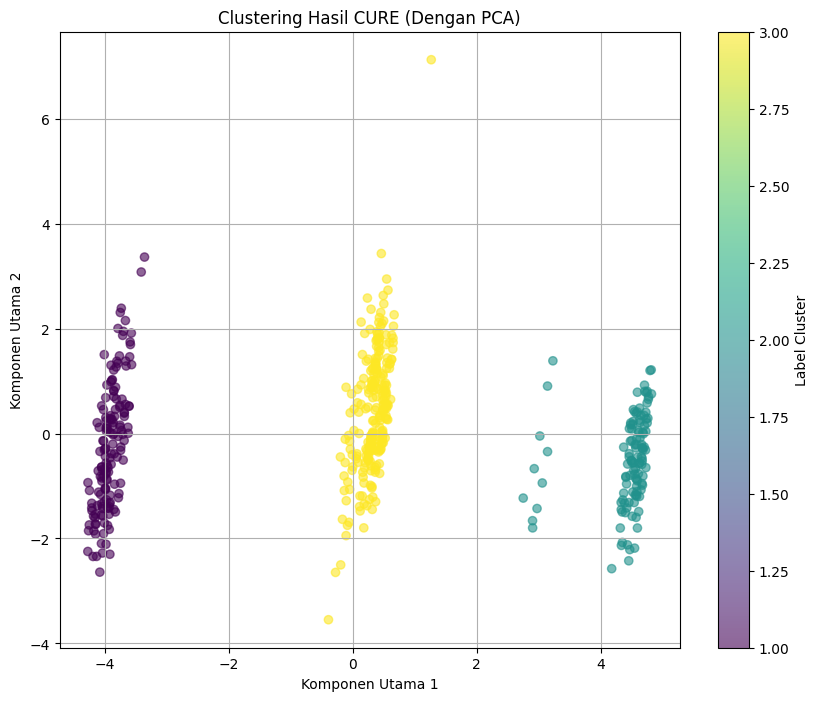

In [121]:
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Clustering Hasil CURE (Dengan PCA)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Label Cluster')
plt.grid(True)
plt.show()

   Cluster  Size
0        1   155
1        2   119
2        3   243


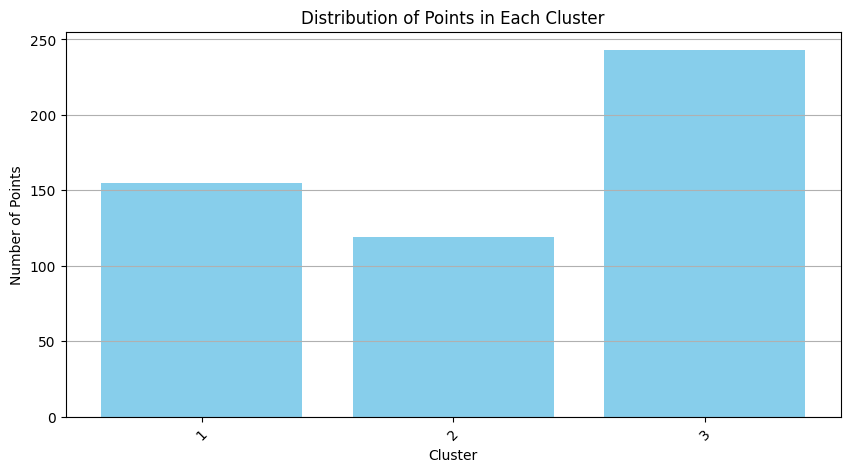

In [122]:
# Count the occurrences of each label
unique_labels, counts = np.unique(labels, return_counts=True)

# Create a DataFrame to display the cluster sizes
cluster_sizes = pd.DataFrame({'Cluster': unique_labels, 'Size': counts})

# Display the cluster sizes
print(cluster_sizes)

# Visualize the cluster sizes
plt.figure(figsize=(10, 5))
plt.bar(cluster_sizes['Cluster'].astype(str), cluster_sizes['Size'], color='skyblue')
plt.title('Distribution of Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [123]:
import joblib

def save_model(clusters, filename='cure_model.pkl'):
    rep_points = []
    for cluster in clusters:
        rep_points.append(cluster.repPoints)
    joblib.dump(rep_points, filename)

save_model(clusters)


In [124]:
def load_model(filename='cure_model.pkl'):
    return joblib.load(filename)

In [125]:
def load_scaler(filename='scaler.pkl'):
    return joblib.load(filename)

In [126]:
import pandas as pd

data_scaled['Cluster'] = labels  

cluster_summary = data_scaled['Cluster'].value_counts().sort_index()
print("Cluster Summary:")
print(cluster_summary)

for cluster_num in range(1, numDesCluster + 1):
    print(f"\nData in Cluster {cluster_num}:")
    cluster_data = data_scaled[data_scaled['Cluster'] == cluster_num]
    print(cluster_data)


Cluster Summary:
1    155
2    119
3    243
Name: Cluster, dtype: int64

Data in Cluster 1:
            0         1         2         3         4         5         6  \
0    3.925021 -1.061872  1.110797  1.105172 -1.347645  1.284892  1.284892   
1    2.501495  0.941733 -0.188904 -1.307143 -1.347645  1.284892  1.284892   
2    1.077970 -1.061872 -0.560247 -1.192271 -1.347645  1.284892  1.284892   
3   -1.413200  0.941733 -0.931590 -1.192271 -1.347645  1.284892  1.284892   
4    0.188266  0.941733 -0.653083  1.564661 -1.347645  1.284892  1.284892   
..        ...       ...       ...       ...       ...       ...       ...   
287  0.188266 -1.061872  0.275275  1.449789 -0.735940  1.284892  1.284892   
347 -1.413200  0.941733 -0.188904 -1.307143 -0.735940  1.284892  1.284892   
369 -1.413200  0.941733 -1.767112 -0.158421 -0.735940  1.284892  1.284892   
370  0.010325  0.941733 -0.188904  0.645684 -0.735940  1.284892  1.284892   
388 -0.523497  0.941733 -1.117261 -1.077399 -0.735940  1.2848

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster.cure import cure
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns


def preprocess_data(data):
    data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    data['Jenis_Kelamin'] = data['Jenis_Kelamin'].map({'Perempuan': 1, 'Laki-laki': 0})
    data['Penyakit_Kronis'] = data['Penyakit_Kronis'].map({
        'Ya': 1, 'Tidak': 0,
    })
    data['Stres'] = data['Stres'].map({'Ya': 1, 'Tidak': 0})
    data['Frekuensi_Makan'] = data['Frekuensi_Makan'].map({
        'Tiga kali atau lebih': 3,
        'Dua kali': 2,
        'Satu kali atau kurang': 1
    })
    data['Variasi_Makanan'] = data['Variasi_Makanan'].map({
        'Makanan bervariasi (misalnya daging, sayuran, buah)': 3,
        'Makanan terbatas pada beberapa jenis saja': 2,
        'Makanan sangat terbatas atau monoton': 1
    })
    data['Asupan_Protein'] = data['Asupan_Protein'].map({
        'Dua kali sehari atau lebih': 3,
        'Sekali sehari': 2,
        'Kurang dari sekali sehari atau tidak pernah': 1
    })
    data['Mobilitas'] = data['Mobilitas'].map({
        'Bergerak dengan bebas tanpa bantuan': 3,
        'Bergerak dengan bantuan': 2,
        'Tidak dapat bergerak tanpa bantuan orang lain': 1
    })
    data['Aktivitas_Sehari_hari'] = data['Aktivitas_Sehari_hari'].map({
        'Tidak ada kesulitan': 3,
        'Kesulitan ringan': 2,
        'Kesulitan berat': 1
    })
    data['Kesehatan_Mulut'] = data['Kesehatan_Mulut'].map({
        'Tidak ada masalah': 3,
        'Ada kesulitan ringan': 2,
        'Kesulitan berat': 1
    })
    data['Masalah_Kognitif'] = data['Masalah_Kognitif'].map({
        'Tidak ada masalah daya ingat': 3,
        'Ada sedikit masalah daya ingat': 2,
        'Masalah daya ingat yang signifikan': 1
    })

    return data.drop(columns=['Nama'])

data_baru = pd.DataFrame({
    'Nama': ['Hasan'],
    'Umur': [75],
    'Jenis_Kelamin': ['Laki-laki'],
    'Berat_Badan': [50],
    'Tinggi_Badan': [160],
    'Penurunan_Berat_Badan': [1],
    'Frekuensi_Makan': ['dua kali'],
    'Variasi_Makanan': ['Makanan bervariasi (misalnya daging, sayuran, buah)'],
    'Asupan_Protein': ['Dua kali sehari atau lebih'],
    'Mobilitas': ['Bergerak dengan bebas tanpa bantuan'],
    'Aktivitas_Sehari_hari': ['Kesulitan ringan'],
    'Kesehatan_Mulut': ['Tidak ada masalah'],
    'Penyakit_Kronis': ['Ya'],
    'Stres': ['Tidak'],
    'Masalah_Kognitif': ['Ada sedikit masalah daya ingat']
})

scaler = load_scaler()
rep_points = load_model()

data_baru_preprocessed = preprocess_data(data_baru)

data_baru_scaled = scaler.transform(data_baru_preprocessed)

def assigned_cluster(new_data_scaled, rep_points):
    distances = []
    for reps in rep_points:
        dist = np.linalg.norm(new_data_scaled - reps, axis=1)
        distances.append(np.min(dist))
    return np.argmin(distances) + 1

label_baru = assigned_cluster(data_baru_scaled, rep_points)

print(f"The new data belongs to cluster: {label_baru}")

The new data belongs to cluster: 1


In [128]:
def intervensi(cluster):
    if cluster == 2:
        return ("Klaster Malnutrisi Berat:\n"
                "Intervensi:\n"
                "- Pendekatan medis yang intensif, termasuk evaluasi komprehensif oleh dokter, ahli gizi, dan tim medis terkait.\n"
                "- Pemberian nutrisi melalui metode enteral atau parenteral sesuai kebutuhan, untuk memastikan asupan nutrisi yang tepat bagi pasien.\n"
                "- Terapi fisik dan intervensi mobilitas yang bertahap guna membantu meningkatkan kekuatan fisik.\n"
                "- Konseling psikologis untuk mengelola stres, depresi, atau kecemasan yang dapat memperburuk kondisi malnutrisi.\n")
    elif cluster == 3:
        return ("Klaster Malnutrisi Ringan:\n"
                "Intervensi:\n"
                "- Pengaturan pola makan yang lebih seimbang dan bervariasi untuk mencegah malnutrisi lebih lanjut.\n"
                "- Kegiatan fisik ringan yang teratur untuk menjaga kesehatan fisik dan mobilitas.\n"
                "- Konseling psikologis ringan, jika diperlukan, untuk membantu manajemen stres.\n"
                "- Pengawasan berkala terhadap status gizi untuk memastikan stabilitas kondisi.\n")
    elif cluster == 1:
        return ("Klaster Cukup Gizi:\n"
                "Intervensi:\n"
                "- Pemeliharaan gizi dengan pola makan yang seimbang dan aktivitas fisik teratur.\n"
                "- Konsultasi berkala dengan ahli gizi untuk memastikan asupan nutrisi tetap optimal.\n"
                "- Pemantauan kondisi kesehatan secara teratur untuk mendeteksi perubahan status gizi atau kondisi fisik.\n")
    else:
        return "Klaster tidak diketahui."

print(intervensi(label_baru))


Klaster Cukup Gizi:
Intervensi:
- Pemeliharaan gizi dengan pola makan yang seimbang dan aktivitas fisik teratur.
- Konsultasi berkala dengan ahli gizi untuk memastikan asupan nutrisi tetap optimal.
- Pemantauan kondisi kesehatan secara teratur untuk mendeteksi perubahan status gizi atau kondisi fisik.



In [129]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_np)

db_index = davies_bouldin_score(data_scaled, labels)
print(f'Davies-Bouldin Index: {db_index:.2f}')

sil_score = silhouette_score(data_scaled, labels)
print(f'Silhouette Score: {sil_score:.2f}')


Davies-Bouldin Index: 0.85
Silhouette Score: 0.49


In [130]:
import numpy as np

# Fungsi untuk menghitung centroid
def calculate_centroid(cluster_points):
    return np.mean(cluster_points, axis=0)

# Fungsi untuk menghitung dispersion
def calculate_dispersion(cluster_points, centroid):
    return np.mean(np.linalg.norm(cluster_points - centroid, axis=1))

# Fungsi untuk menghitung separation antara dua centroid
def calculate_separation(centroid_i, centroid_j):
    return np.linalg.norm(centroid_i - centroid_j)

# Fungsi untuk menghitung Davies-Bouldin Index
def davies_bouldin_index(data_np, labels):
    unique_labels = np.unique(labels)  # Menentukan label unik untuk klaster
    centroids = [calculate_centroid(data_np[labels == label]) for label in unique_labels]
    dispersions = [calculate_dispersion(data_np[labels == label], centroid) for label, centroid in zip(unique_labels, centroids)]
    
    print(f"Centroids: {centroids}")
    print(f"Dispersions: {dispersions}")
    
    db_index = 0
    for i in range(len(centroids)):
        max_ratio = -1
        for j in range(len(centroids)):
            if i != j:
                separation = calculate_separation(centroids[i], centroids[j])  # Menghitung jarak antar centroid
                ratio = (dispersions[i] + dispersions[j]) / separation  # Menghitung rasio
                print(f"separation (d{str(i+1)}{str(j+1)}): {separation:.4f}")
                #print(f"dispersion (r{str(i+1)}{str(j+1)}): {(dispersions[i] + dispersions[j]):.4f}")
                print(f"ratio (r{str(i+1)}{str(j+1)}): {ratio:.4f}")
                max_ratio = max(max_ratio, ratio)  # Mencari rasio terbesar
        db_index += max_ratio  # Menambahkan nilai rasio terbesar untuk klaster ke dalam DBI
    
    db_index /= len(centroids)  # DBI adalah rata-rata dari rasio terbesar
    return db_index, dispersions, centroids

db_index, dispersions, centroids = davies_bouldin_index(data_np, labels)

print(f'Davies-Bouldin Index: {db_index:.2f}')
print(f'Dispersions for each cluster: {dispersions}')
print(f'Centroids of each cluster: {centroids}')

Centroids: [array([ 0.33521068,  0.12736463, -0.31408229, -0.37186123, -1.12664173,
        1.28489168,  1.28489168,  1.28489168,  1.28386779,  1.28386779,
        1.28386779, -1.528229  , -0.54680433,  1.28386779]), array([-1.25746931e-01, -1.13983678e-03,  1.33290999e-01,  7.90454378e-02,
        1.43844181e+00, -1.41734907e+00, -1.41734907e+00, -1.41734907e+00,
       -1.47604758e+00, -1.47604758e+00, -1.47604758e+00,  6.54352195e-01,
        1.82880776e+00, -1.47604758e+00]), array([-0.15223774, -0.08068262,  0.13506636,  0.19848594,  0.01421767,
       -0.12548836, -0.12548836, -0.12548836, -0.0960899 , -0.0960899 ,
       -0.0960899 ,  0.6543522 , -0.54680433, -0.0960899 ])]
Dispersions: [1.9810670015191736, 1.8751490098308243, 1.879772317601249]
separation (d12): 8.3663
ratio (r12): 0.4609
separation (d13): 4.5230
ratio (r13): 0.8536
separation (d21): 8.3663
ratio (r21): 0.4609
separation (d23): 4.5074
ratio (r23): 0.8330
separation (d31): 4.5230
ratio (r31): 0.8536
separation (

Cluster count: 500
Cluster count: 450
Cluster count: 400
Cluster count: 350
Cluster count: 300
Cluster count: 250
Cluster count: 200
Cluster count: 150
Cluster count: 100
Cluster count: 50
Cluster count: 2
Cluster count: 500
Cluster count: 450
Cluster count: 400
Cluster count: 350
Cluster count: 300
Cluster count: 250
Cluster count: 200
Cluster count: 150
Cluster count: 100
Cluster count: 50
Cluster count: 3
Cluster count: 500
Cluster count: 450
Cluster count: 400
Cluster count: 350
Cluster count: 300
Cluster count: 250
Cluster count: 200
Cluster count: 150
Cluster count: 100
Cluster count: 50
Cluster count: 4
Cluster count: 500
Cluster count: 450
Cluster count: 400
Cluster count: 350
Cluster count: 300
Cluster count: 250
Cluster count: 200
Cluster count: 150
Cluster count: 100
Cluster count: 50
Cluster count: 5
Cluster count: 500
Cluster count: 450
Cluster count: 400
Cluster count: 350
Cluster count: 300
Cluster count: 250
Cluster count: 200
Cluster count: 150
Cluster count: 100
Clust

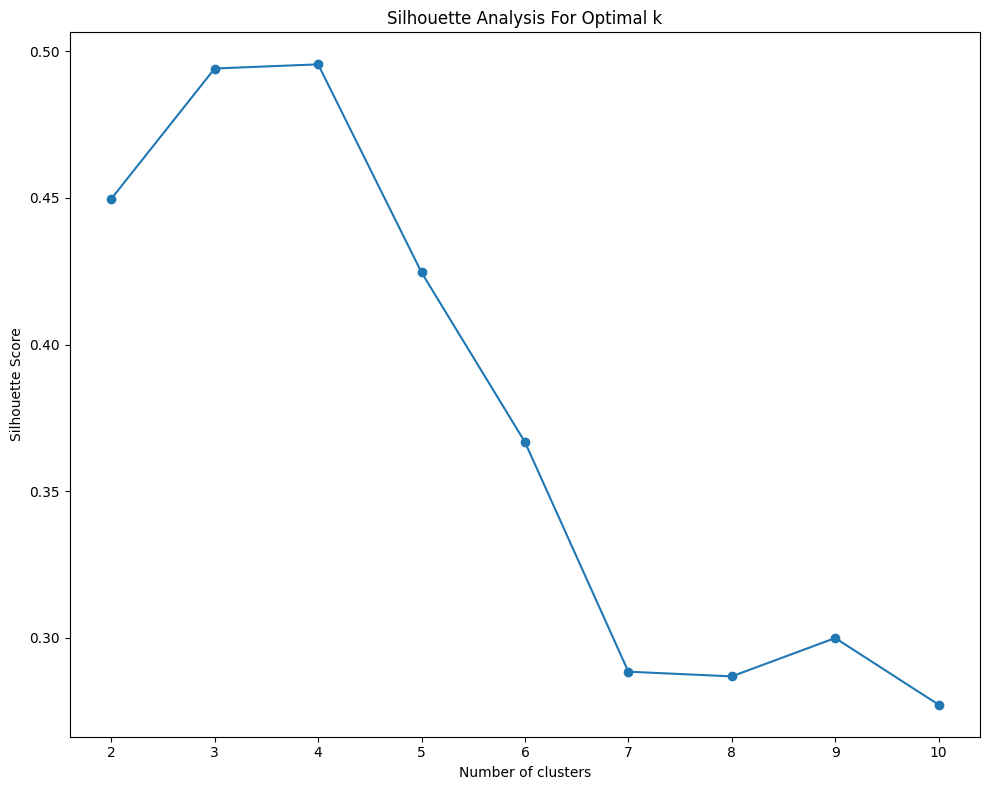

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
clusters_range = range(2, 11)  

for num_clusters in clusters_range:
    clusters, labels = runCURE(data_np, numRepPoints, alpha, num_clusters)
    centroids = [clust.center for clust in clusters]
    silhouette_scores.append(silhouette_score(data_np, labels))

plt.figure(figsize=(10, 8))
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')

plt.tight_layout()
plt.show()

In [132]:
# data_np = data_scaled.values
# pca = PCA(n_components=2)
# data_pca = pca.fit_transform(data_np)

# data_baru_pca = pca.transform(data_baru_scaled)

# plt.figure(figsize=(10, 6))

# # Data lama
# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', label='Data Lama', alpha=0.6)

# # Data baru
# plt.scatter(data_baru_pca[:, 0], data_baru_pca[:, 1], c=label_baru, cmap='plasma', label='Data Baru', marker='x', s=100)

# plt.title('PCA of Clusters')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster Label')
# plt.legend()
# plt.show()